In [8]:
import os
import sys
import numpy as np

# Custom utils
PROJECT_ROOT = '../'
sys.path.append(PROJECT_ROOT)
from scripts.Visualization_functions import plot_multiple_ROC, print_metrics

In [11]:
## Load model predictions ##

# 'Individual' Models
RF_val_pred_proba = np.load(os.path.join(PROJECT_ROOT,'models','RF','RF_y_val_proba.npy'))
XGBoost_val_proba = np.load(os.path.join(PROJECT_ROOT,'research','XGBoost','XGBoost_validation_proba.npy'))
ANN_val_proba = np.load(os.path.join(PROJECT_ROOT,'models','ANN','ANN_val_proba.npy'))
LSTM_pred_proba = np.load(os.path.join(PROJECT_ROOT,'models','LSTM','LSTM_y_val_proba.npy'))

# Ensemble meta-learners
DT_ANN_RT_SVM_pred_proba = np.load(os.path.join(PROJECT_ROOT,'research','ensemble','DT_ANN-RF-SVM','DT_ANN-RT-SVM_val_pred_proba.npy'))
DT_ANN_RT_SVM_XGB_pred_proba = np.load(os.path.join(PROJECT_ROOT,'research','ensemble','DT_ANN-RF-SVM-XGB','DT_ANN-RT-SVM-XGB_valid_proba.npy'))
LogReg_ANN_RT_SVM_val_proba = np.load(os.path.join(PROJECT_ROOT,'models','LogReg__ANN_RF_SVM','LogReg_stack_y_val_proba.npy'))
RF_features_ANN_RF_val_proba = np.load(os.path.join(PROJECT_ROOT,'models','RF__features_ANN_RF','RF_stack_y_val_proba.npy'))

# Label
y_true = np.load(os.path.join(PROJECT_ROOT,'data','processed','y_validation.npy'))
y_true_LSTM = np.load(os.path.join(PROJECT_ROOT,'models','LSTM','y1_validation.npy'))

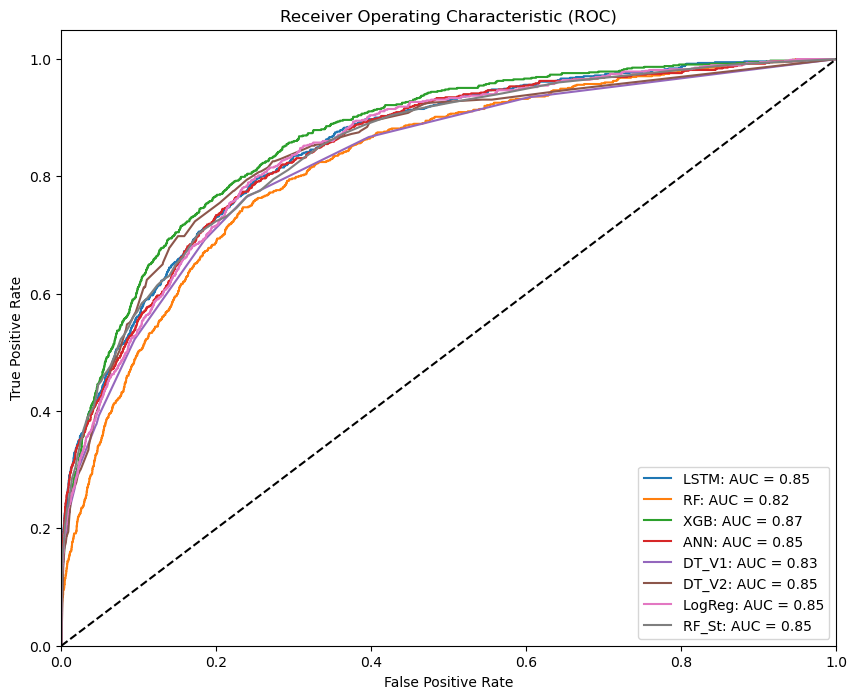

In [12]:
predictions = [LSTM_pred_proba,RF_val_pred_proba,XGBoost_val_proba,ANN_val_proba,DT_ANN_RT_SVM_pred_proba,DT_ANN_RT_SVM_XGB_pred_proba,LogReg_ANN_RT_SVM_val_proba,RF_features_ANN_RF_val_proba]
names = ['LSTM', 'RF','XGB','ANN','DT_V1','DT_V2','LogReg','RF_St'] 
y_true_list = [y_true_LSTM] + [y_true] *(len(names)-1)

plot_multiple_ROC(
    y_true_list,
    predictions,
    names
)

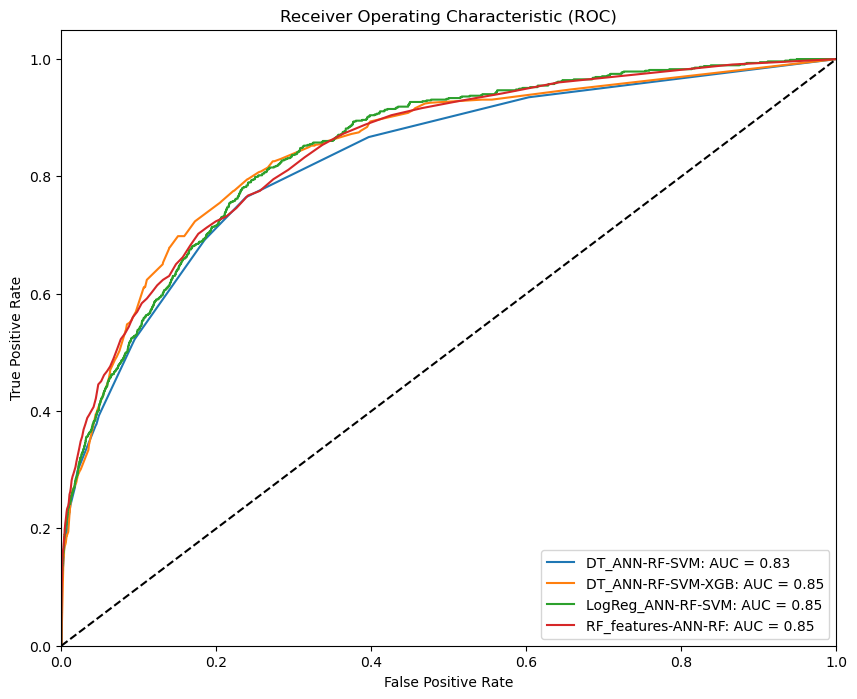

In [13]:
plot_multiple_ROC(
    y_true,
    [DT_ANN_RT_SVM_pred_proba,DT_ANN_RT_SVM_XGB_pred_proba,LogReg_ANN_RT_SVM_val_proba,RF_features_ANN_RF_val_proba],
    ['DT_ANN-RF-SVM','DT_ANN-RF-SVM-XGB','LogReg_ANN-RF-SVM','RF_features-ANN-RF']    
)

In [14]:
## DT_V1
thresh = 0.9
y_pred = (DT_ANN_RT_SVM_pred_proba > thresh).astype(int)
print_metrics(y_true,y_pred)

Validation set accuracy: 0.9946942690343792
f1 score:  0.1671018276762402
Precision: 0.24181360201511334
Recall: 0.1276595744680851


In [19]:
## DT_V2
thresh = 0.90
y_pred = (DT_ANN_RT_SVM_XGB_pred_proba > thresh).astype(int)
print_metrics(y_true,y_pred)

Validation set accuracy: 0.9936907817775584
f1 score:  0.1644640234948605
Precision: 0.18360655737704917
Recall: 0.14893617021276595


In [26]:
## LogReg
thresh = 0.9
y_pred = (LogReg_ANN_RT_SVM_val_proba > thresh).astype(int)
print_metrics(y_true,y_pred)

Validation set accuracy: 0.9953373879393029
f1 score:  0.18743961352657004
Precision: 0.34275618374558303
Recall: 0.12898936170212766


In [31]:
## RF_features
thresh = 0.8
y_pred = (RF_features_ANN_RF_val_proba > thresh).astype(int)
print_metrics(y_true,y_pred)

Validation set accuracy: 0.9951100786711833
f1 score:  0.19378427787934185
Precision: 0.30994152046783624
Recall: 0.14095744680851063


In [16]:
## LSTM
print_metrics(y_true_LSTM,(LSTM_pred_proba>0.9).astype(int))

Validation set accuracy: 0.9949603872019338
f1 score:  0.21840068787618228
Precision: 0.30900243309002434
Recall: 0.16888297872340424
